In [1]:
# standard imports and setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import mean

# data preparation
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE

# machine learning
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# model evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, auc, recall_score, matthews_corrcoef, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")

# **1. Data Collection**



## Read the dataset

In [2]:
#Load the dataset
from google.colab import files
file = files.upload()  #upload file into google colab session
df_c = pd.read_csv("online_shoppers_intention.csv") 
df_c.head()

Saving online_shoppers_intention.csv to online_shoppers_intention.csv


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
df = df_c

# **2. Data Visualization**

## 2.1. Plot the dataset

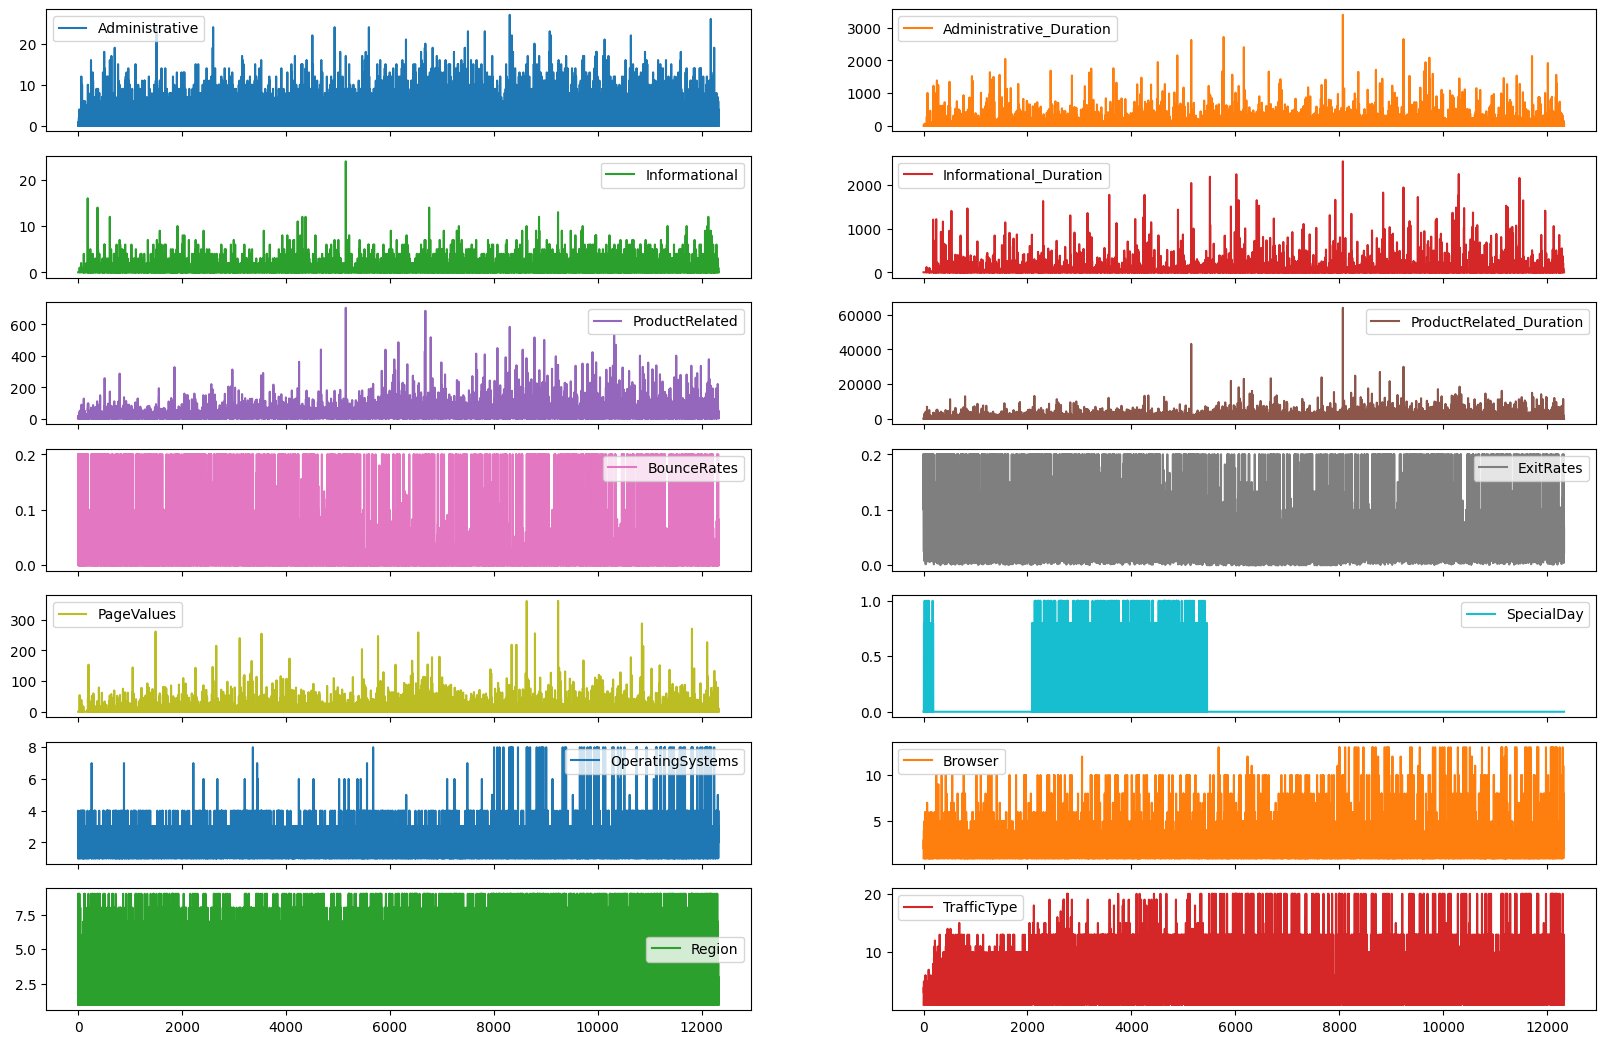

In [ ]:
df.plot(subplots=True, layout=(7,2), figsize=(20,13))
plt.show()

## 2.2. Check correlation between the input variables through heatmap

<Axes: >

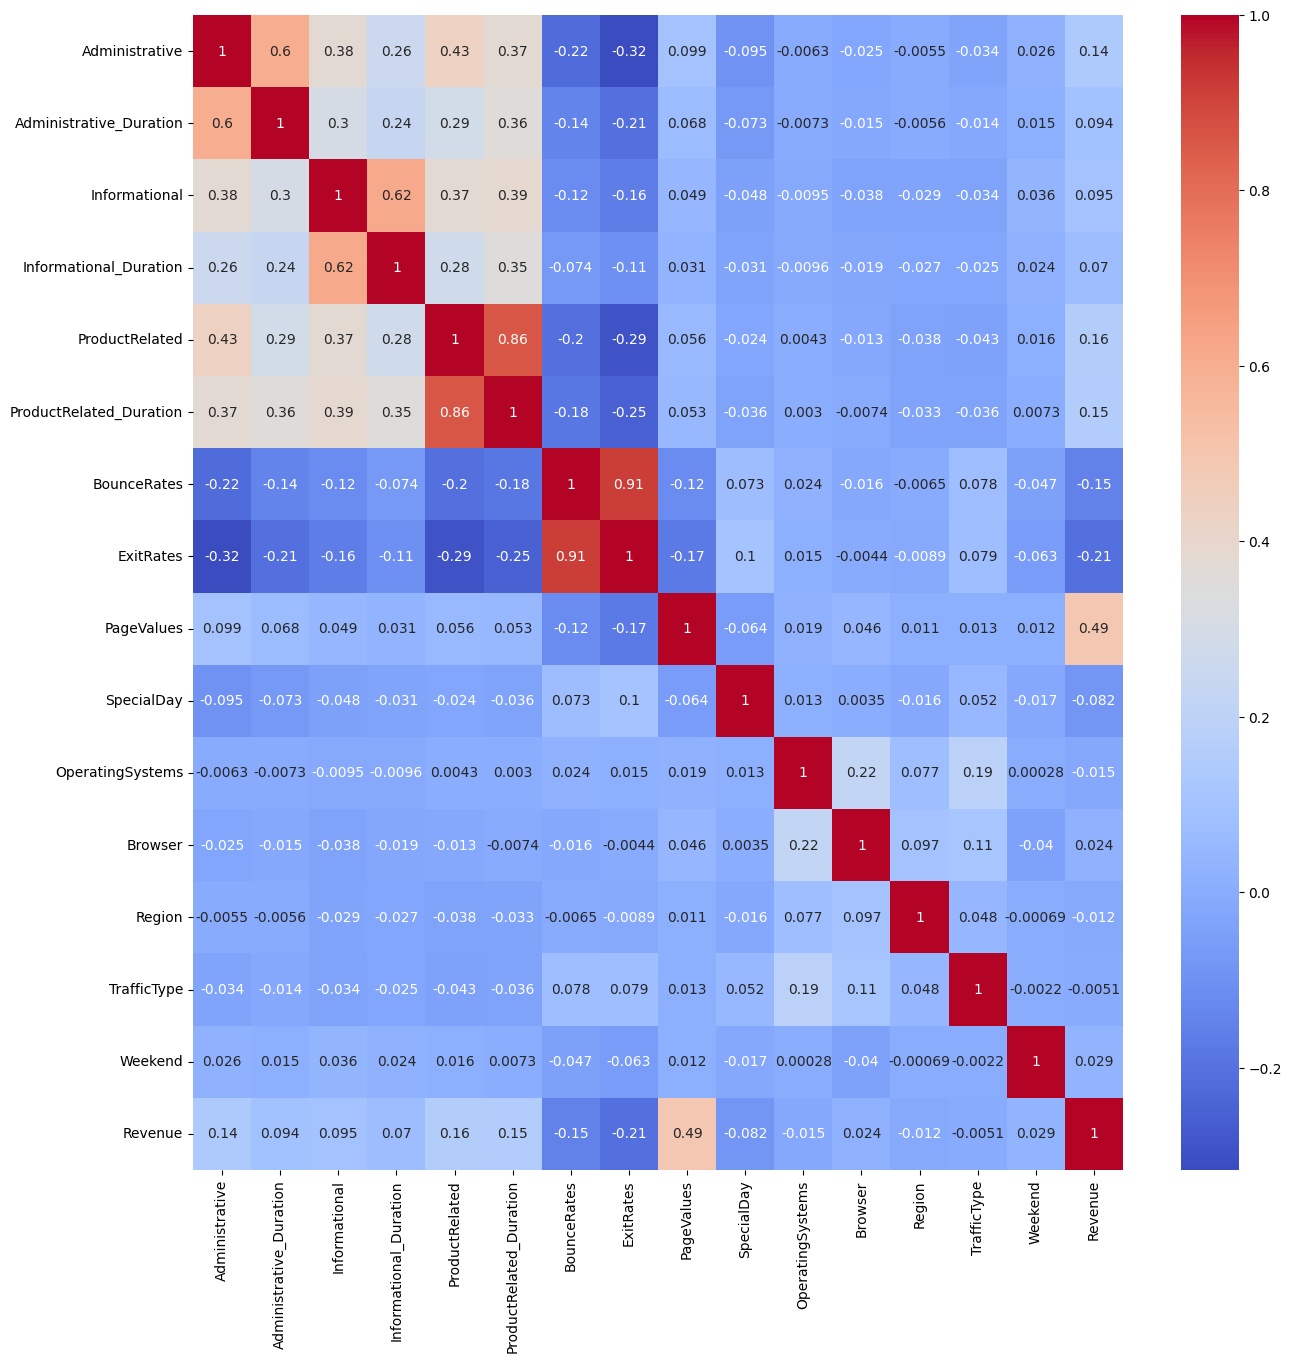

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

## 2.3. Check for outliers through boxplot

[Text(1, 0, 'Administrative'),
 Text(2, 0, 'Administrative_Duration'),
 Text(3, 0, 'Informational'),
 Text(4, 0, 'Informational_Duration'),
 Text(5, 0, 'ProductRelated'),
 Text(6, 0, 'ProductRelated_Duration'),
 Text(7, 0, 'BounceRates'),
 Text(8, 0, 'ExitRates'),
 Text(9, 0, 'PageValues'),
 Text(10, 0, 'SpecialDay'),
 Text(11, 0, 'OperatingSystems'),
 Text(12, 0, 'Browser'),
 Text(13, 0, 'Region'),
 Text(14, 0, 'TrafficType'),
 Text(15, 0, 'Weekend'),
 Text(16, 0, 'Revenue')]

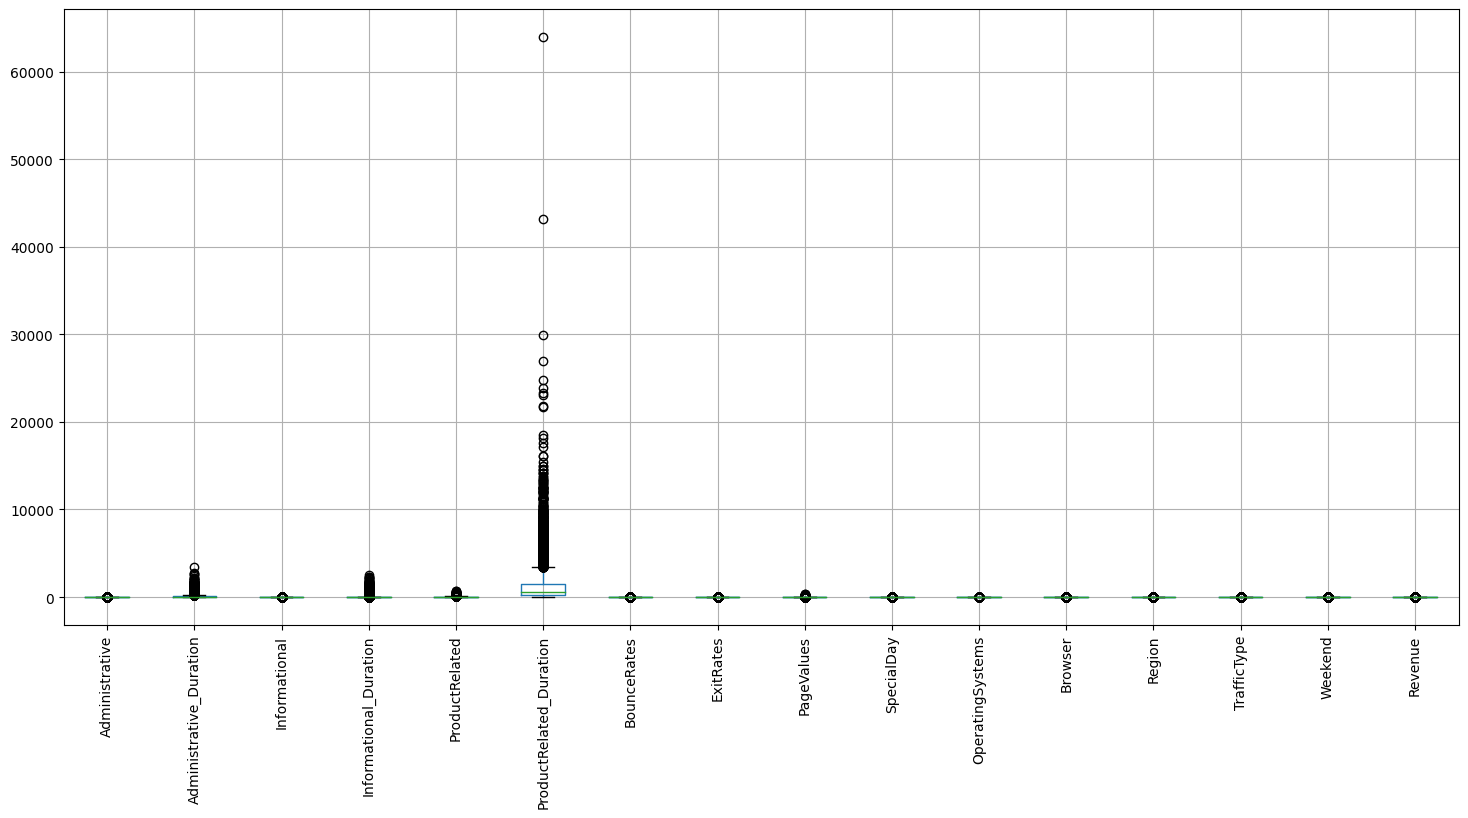

In [ ]:
fig = plt.figure(figsize=(18, 8))  # set a figure size
ax = df.boxplot()  
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

## 2.4. Additional visualizations

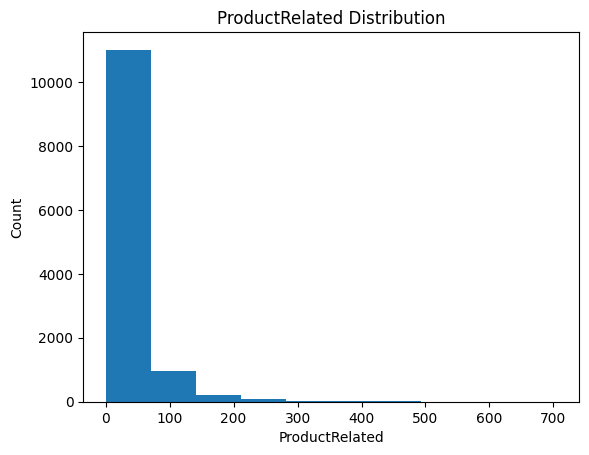

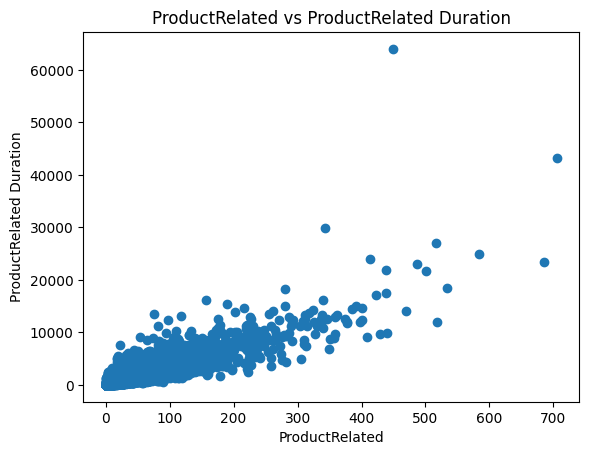

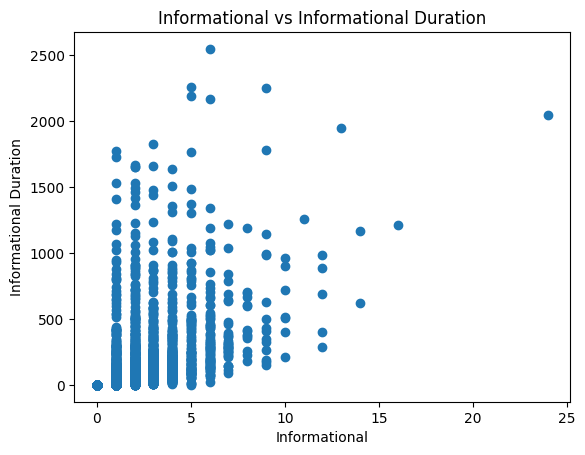

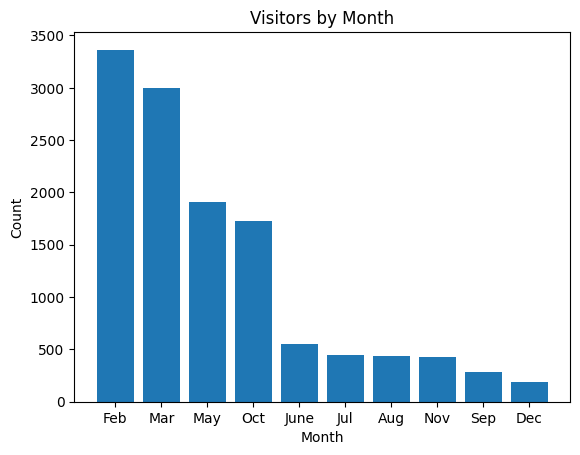

In [ ]:
# Plot a histogram of the 'ProductRelated' column
plt.hist(df['ProductRelated'])
plt.title('ProductRelated Distribution')
plt.xlabel('ProductRelated')
plt.ylabel('Count')
plt.show()

# Plot a scatter plot of 'ProductRelated' vs 'ProductRelated_Duration'
plt.scatter(df['ProductRelated'], df['ProductRelated_Duration'])
plt.title('ProductRelated vs ProductRelated Duration')
plt.xlabel('ProductRelated')
plt.ylabel('ProductRelated Duration')
plt.show()

# Plot a scatter plot of 'ProductRelated' vs 'ProductRelated_Duration'
plt.scatter(df['Informational'], df['Informational_Duration'])
plt.title('Informational vs Informational Duration')
plt.xlabel('Informational')
plt.ylabel('Informational Duration')
plt.show()

# Plot a bar chart of the number of visitors by month
plt.bar(df['Month'].unique(), df['Month'].value_counts())
plt.title('Visitors by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

# **3. Data Exploration**

In [ ]:
df.shape  # Print size of the dataset

(12330, 18)

In [ ]:
df.info() # column and row level analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
df.isna().sum() # check missing values

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [ ]:
df.duplicated().sum() # check for duplicate rows

125

In [4]:
df.drop_duplicates(inplace=True)  # Drop the duplicate records

In [ ]:
df.duplicated().sum() # check for duplicate rows after dropping them

0

In [48]:
df.shape # check the updated size of the dataset

(12205, 18)

## 3.1. Check for numerical and categorical variables

In [50]:
df.describe(include='all')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205,12205.000000,12205.000000,12205.000000,12205.000000,12205,12205,12205
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3329,NaN,NaN,NaN,NaN,10431,9346,10297
mean,2.338878,81.646331,0.508726,34.825454,32.045637,1206.982457,0.020370,0.041466,5.949574,0.061942,NaN,2.124211,2.357804,3.153298,4.073904,NaN,NaN,NaN
std,3.330436,177.491845,1.275617,141.424807,44.593649,1919.601400,0.045255,0.046163,18.653671,0.199666,NaN,0.906823,1.710114,2.402340,4.016654,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,8.000000,193.000000,0.000000,0.014231,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.000000,9.000000,0.000000,0.000000,18.000000,608.942857,0.002899,0.025000,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,4.000000,94.700000,0.000000,0.000000,38.000000,1477.154762,0.016667,0.048529,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


Some of the categorical variables are considered as numeric. Let us first convert them into categorical for further processing.

In [ ]:
# check the numerical variables

df.describe(include=['int','float','complex'])

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000
mean,2.338878,81.646331,0.508726,34.825454,32.045637,1206.982457,0.020370,0.041466,5.949574,0.061942,2.124211,2.357804,3.153298,4.073904
std,3.330436,177.491845,1.275617,141.424807,44.593649,1919.601400,0.045255,0.046163,18.653671,0.199666,0.906823,1.710114,2.402340,4.016654
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,8.000000,193.000000,0.000000,0.014231,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,9.000000,0.000000,0.000000,18.000000,608.942857,0.002899,0.025000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,94.700000,0.000000,0.000000,38.000000,1477.154762,0.016667,0.048529,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


##Univariate Analysis

ValueError: ignored

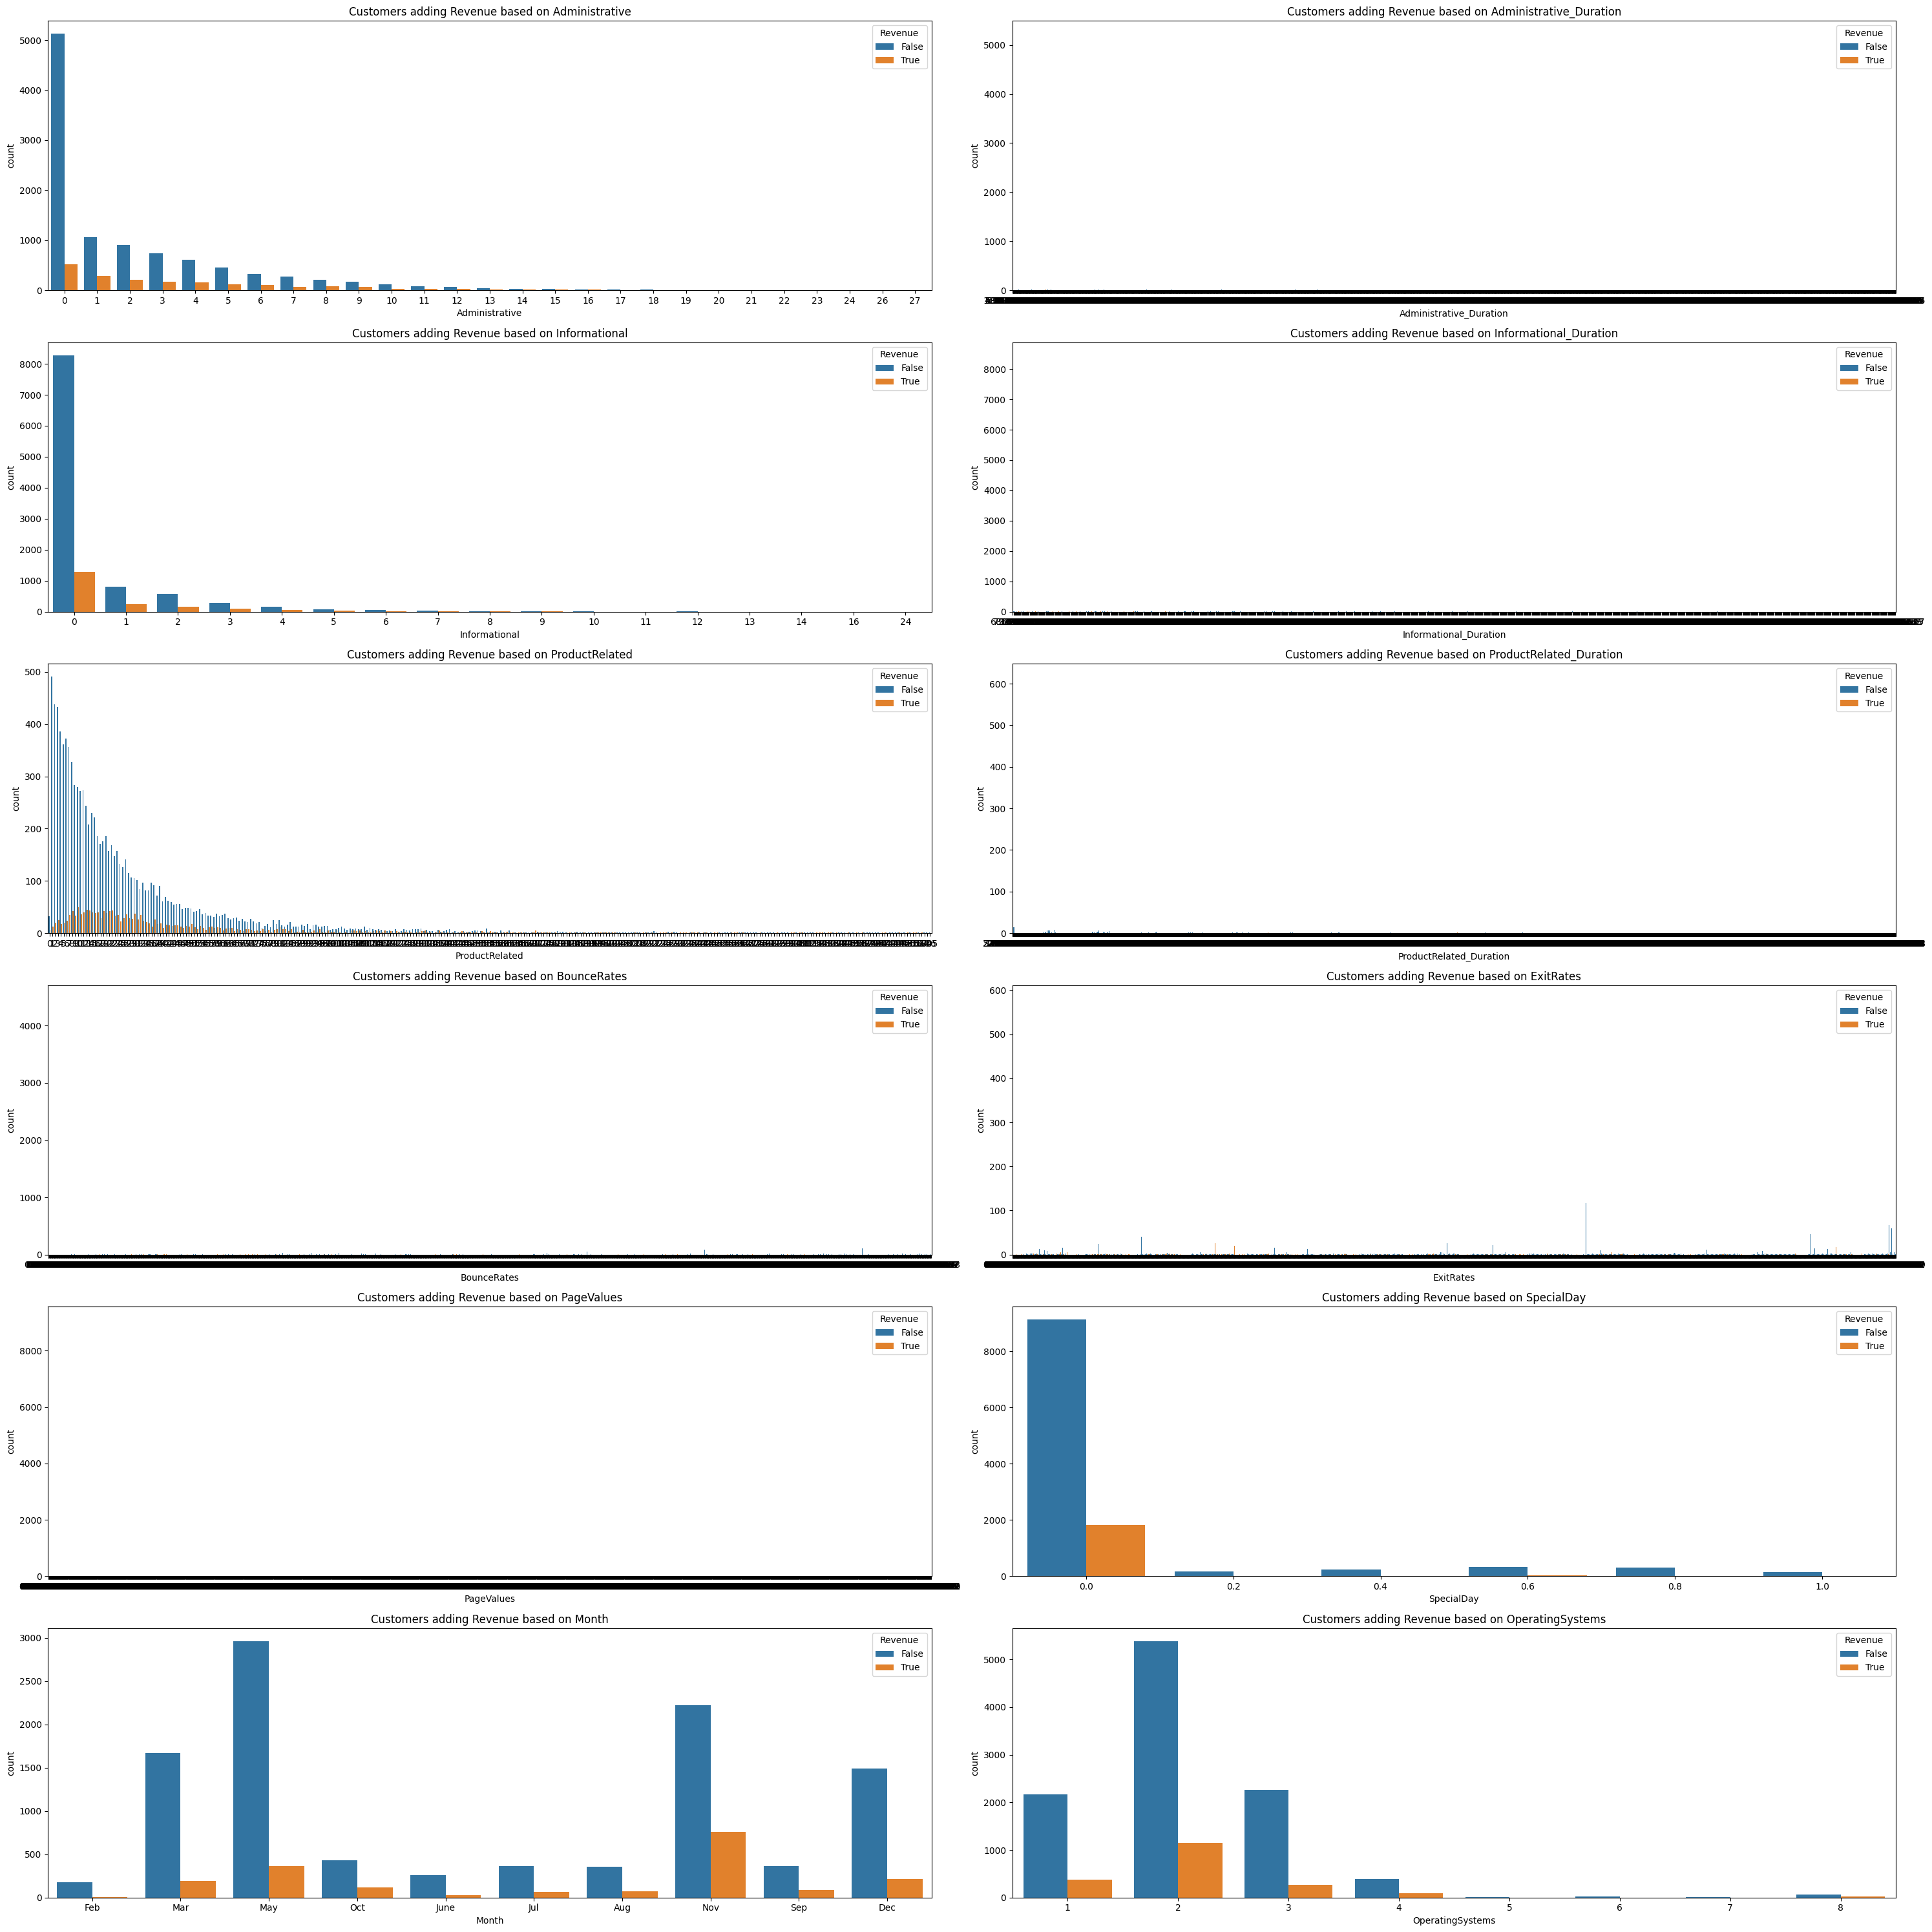

In [7]:
# Explore the input variables

plt.figure(figsize=(30, 30))
plot_number = 0
for i in [col for col in df.columns if col != 'Revenue']:
    if plot_number == 12:
        break  # skip the 13th plot
    plot_number += 1
    ax = plt.subplot(6, 2, plot_number, adjustable='datalim')
    sns.countplot(x=i, hue='Revenue', data=df)
    ax.set_title('Customers adding Revenue based on ' + i, fontdict=None)
    plt.tight_layout()

Text(0, 0.5, '')

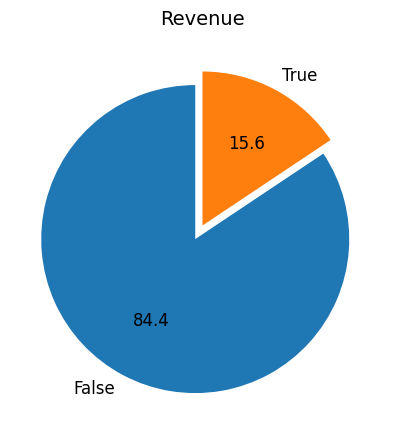

In [10]:
# Explore the target variable

plt.figure(figsize=(5,5))
df['Revenue'].value_counts().plot(kind='pie',autopct='%1.1f', textprops={'fontsize': 12},startangle=90,explode =(0.1,0))
plt.title('Revenue', fontsize = 14)
plt.ylabel('')

# **4. Data Processing**

## 4.1. Drop unnecessary columns

In [13]:
# Drop the highly correlated features

df = df.drop(["BounceRates"], axis=1)

## 4.2. Convert categorical data into numerical form

In [14]:
# Define a function for onehot encoding

def onehot_encoding(df, attr, prefix):
    df = df.copy()
    dummies = pd.get_dummies(df[attr], prefix=prefix)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(attr, axis=1)
    return df

# Define a function for ordinal encoding

def ordinal_encode(df, attr, order):
    df = df.copy()
    df[attr] = df[attr].apply(lambda x: order.index(x))
    return df

In [15]:
# Encode VisitorType using onehot encoding

df = onehot_encoding(df, 'VisitorType', 'VisitorType')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.0,0.0,Feb,1,1,1,1,False,False,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.10,0.0,0.0,Feb,2,2,1,2,False,False,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.0,0.0,Feb,4,1,9,3,False,False,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.14,0.0,0.0,Feb,3,2,2,4,False,False,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.05,0.0,0.0,Feb,3,3,1,4,True,False,0,0,1


In [16]:
# Convert Weekend and Revenue to numeric

df['Weekend'] = df['Weekend'].astype(int)
df['Revenue'] = df['Revenue'].astype(int)

# Convert Month to numeric keeping the order in mind

month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df = ordinal_encode(df, 'Month', month_order)

df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.0,0.0,1,1,1,1,1,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.10,0.0,0.0,1,2,2,1,2,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.0,0.0,1,4,1,9,3,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.14,0.0,0.0,1,3,2,2,4,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.05,0.0,0.0,1,3,3,1,4,1,0,0,0,1


In [17]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems',
       'Browser', 'Region', 'TrafficType', 'Weekend', 'Revenue',
       'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor'],
      dtype='object')

## 4.3. Split and scale the data

In [18]:
# Split the data into input and target

y = df['Revenue'] # target variable
X = df.drop('Revenue',  axis=1) # input variables

In [21]:
# Normalise using StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

## 4.4. Balance the imbalanced target variable

In [22]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Split the training dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

# Use SMOTE to oversample the minority class in the training set
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

In [23]:
print("Distribution of target variable before sampling:\n", y.value_counts())
print("\nDistribution of target variable after sampling:\n", y_train.value_counts())

Distribution of target variable before sampling:
 0    10297
1     1908
Name: Revenue, dtype: int64

Distribution of target variable after sampling:
 0    7415
1    7415
Name: Revenue, dtype: int64


# **5. Model Performance Evaluation and Interpretation**

## 5.1. Logistic Regression

In [24]:
# Create the logistic regression model
logreg = LogisticRegression(random_state=42)

# Train the model on the training set
logreg.fit(X_train, y_train)

# Predict the target variable for the test set
y_val_pred = logreg.predict(X_val)

# Predict the target variable for the test set
y_pred = logreg.predict(X_test)

In [25]:
# Show the classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92      1557
           1       0.55      0.70      0.62       274

    accuracy                           0.87      1831
   macro avg       0.75      0.80      0.77      1831
weighted avg       0.89      0.87      0.88      1831



*************************Testing Model***********************************
Accuracy: 0.869
F1 score: 0.617
MCC : 0.545
Sensitivity: 0.704
Specificity: 0.898
ROC AUC score: 0.902


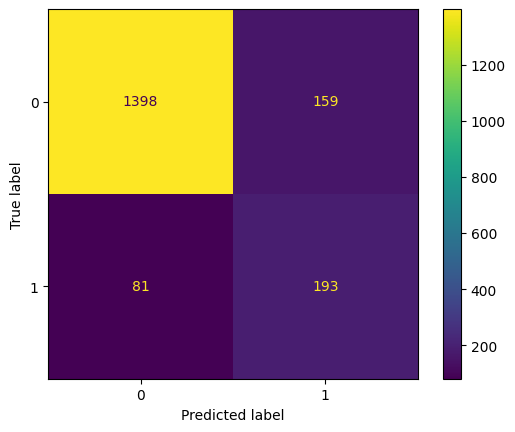


*************************Training Model**********************************
Accuracy: 0.834
F1 score: 0.823
Sensitivity: 0.771
Specificity: 0.898
ROC AUC score: 0.834


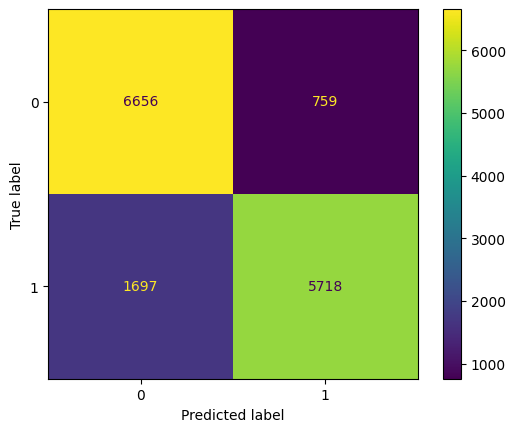

In [35]:
# Evaluate the testing model using accuracy score, F1 score, confusion matrix, MCC, sensitivity, specificity and ROC AUC score
print("*************************Testing Model***********************************")
print("Accuracy:", round(accuracy_score(y_test, y_pred),3))
print("F1 score:", round(f1_score(y_test, y_pred),3))
print("MCC :", round(matthews_corrcoef(y_test, y_pred),3))

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()  # extract true positives, false positives, true negatives, false negatives from confusion matrix
sensitivity = recall_score(y_test, y_pred)
specificity = tn / (tn + fp)
print("Sensitivity:",round(sensitivity,3))
print("Specificity:",round(specificity,3))

y_pred_prob = logreg.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC AUC score:", round(roc_auc,3))

disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

# Predict the target variable for the train set
y_predx = logreg.predict(X_train)

# Evaluate the training model using accuracy score, F1 score, confusion matrix, MCC, sensitivity, specificity and ROC AUC score
print("\n*************************Training Model**********************************")
print("Accuracy:", round(accuracy_score(y_train, y_predx),3))
print("F1 score:", round(f1_score(y_train, y_predx),3))

cm = confusion_matrix(y_train, y_predx)
tn, fp, fn, tp = cm.ravel()  # extract true positives, false positives, true negatives, false negatives from confusion matrix
sensitivity = recall_score(y_train, y_predx)
specificity = tn / (tn + fp)
print("Sensitivity:",round(sensitivity,3))
print("Specificity:",round(specificity,3))

y_pred_prob_t = logreg.predict_proba(X_train)[:,1]
roc_auc = roc_auc_score(y_train, y_predx)
print("ROC AUC score:", round(roc_auc,3))

disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

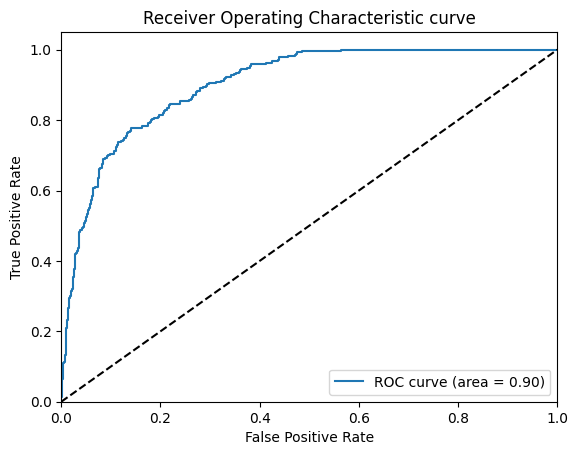

In [36]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate AUC score
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic curve')
plt.legend(loc="lower right")
plt.show()

## **5.2. Decision Tree**

In [37]:
# Create the decision tree classifier model
clf = DecisionTreeClassifier(random_state=42)

# Train the model on the training set
clf.fit(X_train, y_train)

# Predict the target variable for the test set
y_val_pred = clf.predict(X_val)

# Predict the target variable for the test set
y_pred = clf.predict(X_test)

In [38]:
# Show the classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1557
           1       0.54      0.62      0.58       274

    accuracy                           0.86      1831
   macro avg       0.73      0.76      0.75      1831
weighted avg       0.87      0.86      0.87      1831



*************************Testing Model***********************************
Accuracy: 0.863
F1 score: 0.575
MCC : 0.496
Sensitivity: 0.62
Specificity: 0.906
ROC AUC score: 0.763


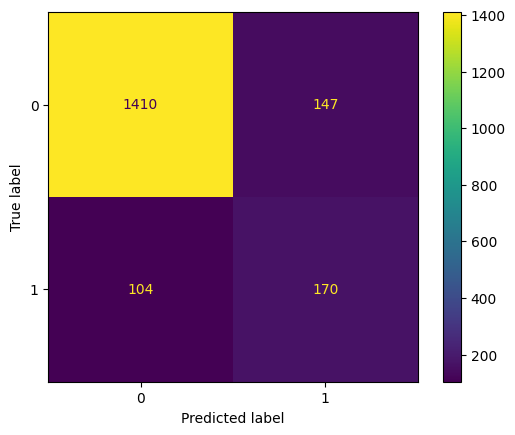


*************************Training Model**********************************
Accuracy: 1.0
F1 score: 1.0
Sensitivity: 1.0
Specificity: 1.0
ROC AUC score: 1.0


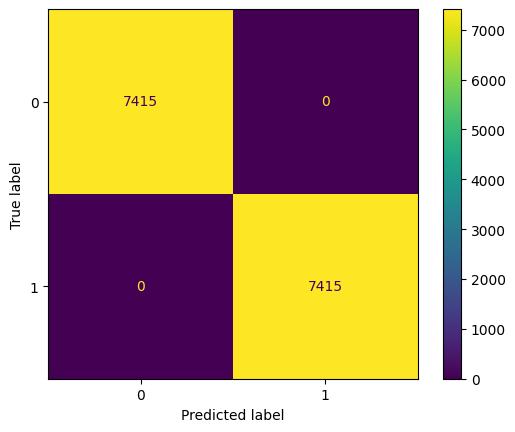

In [39]:
# Evaluate the testing model using accuracy score, F1 score, confusion matrix, MCC, sensitivity, specificity and ROC AUC score
print("*************************Testing Model***********************************")
print("Accuracy:", round(accuracy_score(y_test, y_pred),3))
print("F1 score:", round(f1_score(y_test, y_pred),3))
print("MCC :", round(matthews_corrcoef(y_test, y_pred),3))

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()  # extract true positives, false positives, true negatives, false negatives from confusion matrix
sensitivity = recall_score(y_test, y_pred)
specificity = tn / (tn + fp)
print("Sensitivity:",round(sensitivity,3))
print("Specificity:",round(specificity,3))

y_pred_prob = clf.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC AUC score:", round(roc_auc,3))

disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

# Predict the target variable for the train set
y_predx = clf.predict(X_train)

# Evaluate the training model using accuracy score, F1 score, confusion matrix, MCC, sensitivity, specificity and ROC AUC score
print("\n*************************Training Model**********************************")
print("Accuracy:", round(accuracy_score(y_train, y_predx),3))
print("F1 score:", round(f1_score(y_train, y_predx),3))

cm = confusion_matrix(y_train, y_predx)
tn, fp, fn, tp = cm.ravel()  # extract true positives, false positives, true negatives, false negatives from confusion matrix
sensitivity = recall_score(y_train, y_predx)
specificity = tn / (tn + fp)
print("Sensitivity:",round(sensitivity,3))
print("Specificity:",round(specificity,3))

y_pred_prob_t = clf.predict_proba(X_train)[:,1]
roc_auc = roc_auc_score(y_train, y_predx)
print("ROC AUC score:", round(roc_auc,3))

disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

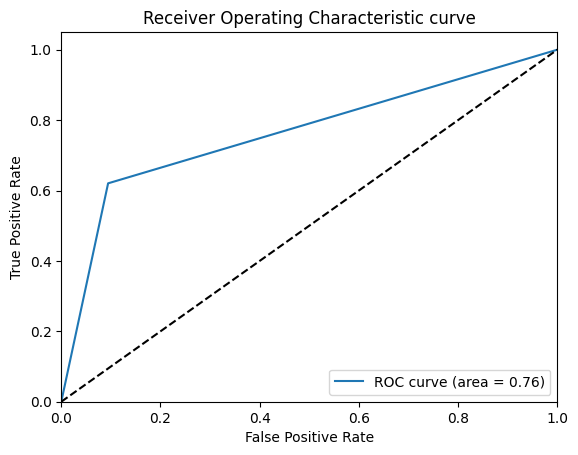

In [40]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate AUC score
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic curve')
plt.legend(loc="lower right")
plt.show()

## **5.3. Random Forest**

In [41]:
# Initialize a Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=50, random_state=42)

# Fit the model on the training data
rf_clf.fit(X_train, y_train)

# Predict the target variable for the test set
y_val_pred = rf_clf.predict(X_val)

# Predict on the test data
y_pred = rf_clf.predict(X_test)

In [42]:
# Show the classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      1557
           1       0.63      0.66      0.65       274

    accuracy                           0.89      1831
   macro avg       0.78      0.80      0.79      1831
weighted avg       0.89      0.89      0.89      1831



*************************Testing Model***********************************
Accuracy: 0.891
F1 score: 0.645
MCC : 0.581
Sensitivity: 0.664
Specificity: 0.931
ROC AUC score: 0.922


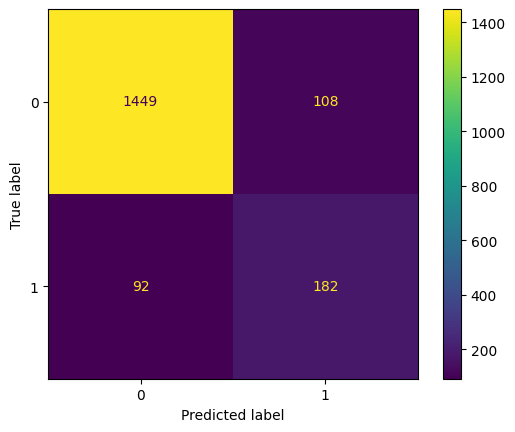


*************************Training Model**********************************
Accuracy: 1.0
F1 score: 1.0
Sensitivity: 1.0
Specificity: 1.0
ROC AUC score: 1.0


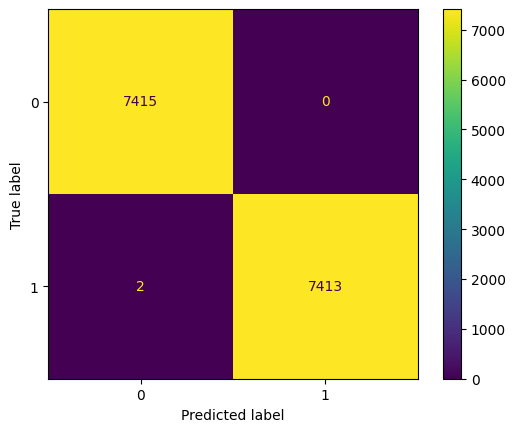

In [43]:
# Evaluate the testing model using accuracy score, F1 score, confusion matrix, MCC, sensitivity, specificity and ROC AUC score
print("*************************Testing Model***********************************")
print("Accuracy:", round(accuracy_score(y_test, y_pred),3))
print("F1 score:", round(f1_score(y_test, y_pred),3))
print("MCC :", round(matthews_corrcoef(y_test, y_pred),3))

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()  # extract true positives, false positives, true negatives, false negatives from confusion matrix
sensitivity = recall_score(y_test, y_pred)
specificity = tn / (tn + fp)
print("Sensitivity:",round(sensitivity,3))
print("Specificity:",round(specificity,3))

y_pred_prob = rf_clf.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC AUC score:", round(roc_auc,3))

disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

# Predict the target variable for the train set
y_predx = rf_clf.predict(X_train)

# Evaluate the training model using accuracy score, F1 score, confusion matrix, MCC, sensitivity, specificity and ROC AUC score
print("\n*************************Training Model**********************************")
print("Accuracy:", round(accuracy_score(y_train, y_predx),3))
print("F1 score:", round(f1_score(y_train, y_predx),3))

cm = confusion_matrix(y_train, y_predx)
tn, fp, fn, tp = cm.ravel()  # extract true positives, false positives, true negatives, false negatives from confusion matrix
sensitivity = recall_score(y_train, y_predx)
specificity = tn / (tn + fp)
print("Sensitivity:",round(sensitivity,3))
print("Specificity:",round(specificity,3))

y_pred_prob_t = rf_clf.predict_proba(X_train)[:,1]
roc_auc = roc_auc_score(y_train, y_predx)
print("ROC AUC score:", round(roc_auc,3))

disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

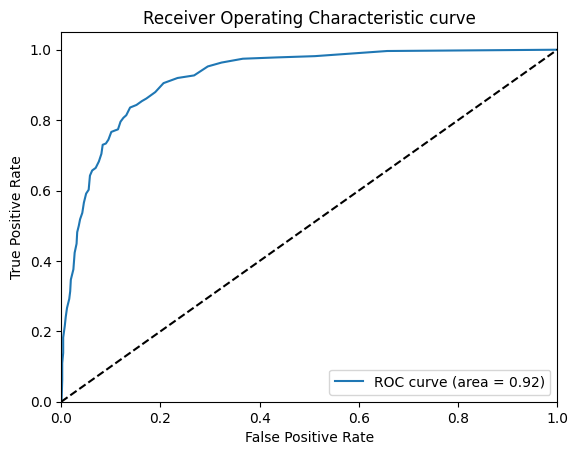

In [44]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate AUC score
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic curve')
plt.legend(loc="lower right")
plt.show()

In [45]:
# Hyperparameter tuning to reduce overfitting in RandomForestClassifier

# Import necessary libraries
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
    'criterion' : ['gini', 'entropy']

}

# Initialize a Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(rf_clf, param_grid=param_grid, cv=3, n_jobs=-1)

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Print the best parameters
print("Best parameters: ", best_params)

Best parameters:  {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [46]:
# Initialize a Random Forest Classifier for best parameters
rf_clf_b = RandomForestClassifier(**best_params, random_state=42)

# Fit the model on the training data
rf_clf_b.fit(X_train, y_train)

# Predict the target variable for the test set
y_val_pred = rf_clf_b.predict(X_val)

# Predict on the test data
y_pred = rf_clf_b.predict(X_test)

*************************Testing Model***********************************
Accuracy: 0.89
F1 score: 0.648
MCC : 0.584
Sensitivity: 0.675
Specificity: 0.928
ROC AUC score: 0.924


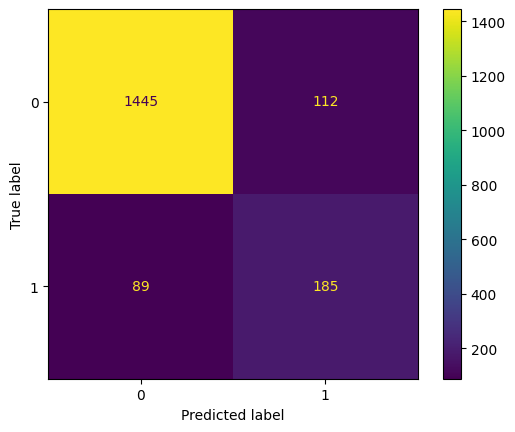


*************************Training Model**********************************
Accuracy: 1.0
F1 score: 1.0
Sensitivity: 1.0
Specificity: 1.0
ROC AUC score: 1.0


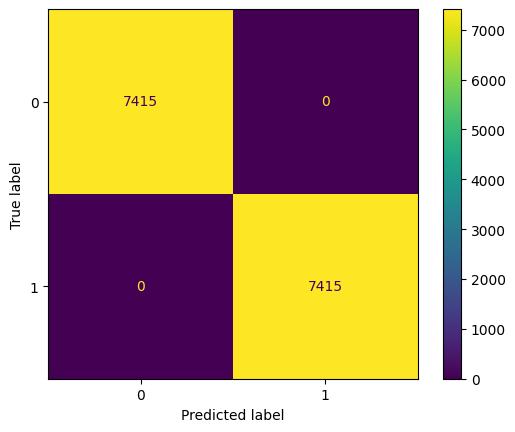

In [47]:
# Evaluate the testing model using accuracy score, F1 score, confusion matrix, MCC, sensitivity, specificity and ROC AUC score
print("*************************Testing Model***********************************")
print("Accuracy:", round(accuracy_score(y_test, y_pred),3))
print("F1 score:", round(f1_score(y_test, y_pred),3))
print("MCC :", round(matthews_corrcoef(y_test, y_pred),3))

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()  # extract true positives, false positives, true negatives, false negatives from confusion matrix
sensitivity = recall_score(y_test, y_pred)
specificity = tn / (tn + fp)
print("Sensitivity:",round(sensitivity,3))
print("Specificity:",round(specificity,3))

y_pred_prob = rf_clf_b.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC AUC score:", round(roc_auc,3))

disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

# Predict the target variable for the train set
y_predx = rf_clf_b.predict(X_train)

# Evaluate the training model using accuracy score, F1 score, confusion matrix, MCC, sensitivity, specificity and ROC AUC score
print("\n*************************Training Model**********************************")
print("Accuracy:", round(accuracy_score(y_train, y_predx),3))
print("F1 score:", round(f1_score(y_train, y_predx),3))

cm = confusion_matrix(y_train, y_predx)
tn, fp, fn, tp = cm.ravel()  # extract true positives, false positives, true negatives, false negatives from confusion matrix
sensitivity = recall_score(y_train, y_predx)
specificity = tn / (tn + fp)
print("Sensitivity:",round(sensitivity,3))
print("Specificity:",round(specificity,3))

y_pred_prob_t = rf_clf_b.predict_proba(X_train)[:,1]
roc_auc = roc_auc_score(y_train, y_predx)
print("ROC AUC score:", round(roc_auc,3))

disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

## **5.4. Naive Bayes**

In [49]:
# Instantiate the classifier
nb = GaussianNB()

# Fit the model on the training data
nb.fit(X_train, y_train)

# Predict the target variable for the test set
y_val_pred = nb.predict(X_val)

# Make predictions on the test data
y_pred = nb.predict(X_test)

*************************Testing Model***********************************
Accuracy: 0.746
F1 score: 0.455
MCC : 0.353
Sensitivity: 0.708
Specificity: 0.753
ROC AUC score: 0.821


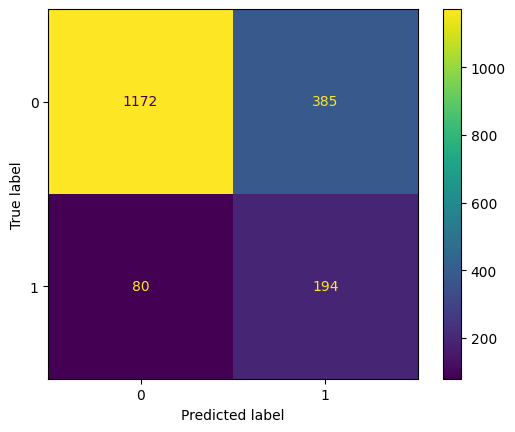


*************************Training Model**********************************
Accuracy: 0.736
F1 score: 0.735
Sensitivity: 0.731
Specificity: 0.742
ROC AUC score: 0.736


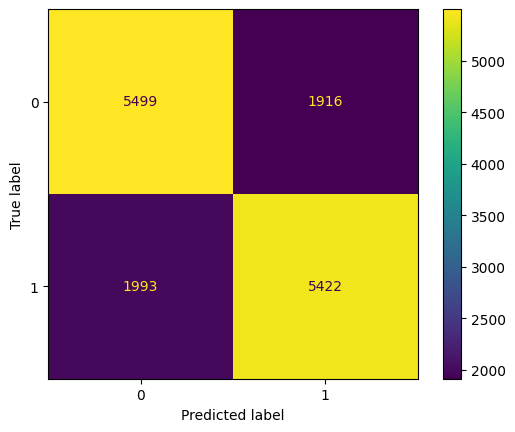

In [50]:
# Evaluate the testing model using accuracy score, F1 score, confusion matrix, MCC, sensitivity, specificity and ROC AUC score
print("*************************Testing Model***********************************")
print("Accuracy:", round(accuracy_score(y_test, y_pred),3))
print("F1 score:", round(f1_score(y_test, y_pred),3))
print("MCC :", round(matthews_corrcoef(y_test, y_pred),3))

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()  # extract true positives, false positives, true negatives, false negatives from confusion matrix
sensitivity = recall_score(y_test, y_pred)
specificity = tn / (tn + fp)
print("Sensitivity:",round(sensitivity,3))
print("Specificity:",round(specificity,3))

y_pred_prob = nb.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC AUC score:", round(roc_auc,3))

disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

# Predict the target variable for the train set
y_predx = nb.predict(X_train)

# Evaluate the training model using accuracy score, F1 score, confusion matrix, MCC, sensitivity, specificity and ROC AUC score
print("\n*************************Training Model**********************************")
print("Accuracy:", round(accuracy_score(y_train, y_predx),3))
print("F1 score:", round(f1_score(y_train, y_predx),3))

cm = confusion_matrix(y_train, y_predx)
tn, fp, fn, tp = cm.ravel()  # extract true positives, false positives, true negatives, false negatives from confusion matrix
sensitivity = recall_score(y_train, y_predx)
specificity = tn / (tn + fp)
print("Sensitivity:",round(sensitivity,3))
print("Specificity:",round(specificity,3))

y_pred_prob_t = nb.predict_proba(X_train)[:,1]
roc_auc = roc_auc_score(y_train, y_predx)
print("ROC AUC score:", round(roc_auc,3))

disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

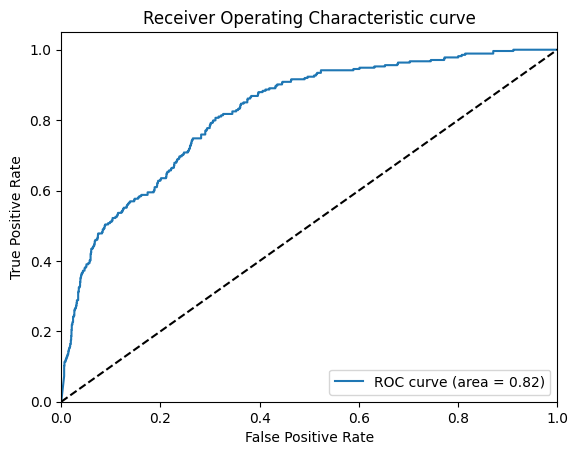

In [51]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate AUC score
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic curve')
plt.legend(loc="lower right")
plt.show()

## 5.5. XGBoost

In [54]:
import xgboost as xgb

# Define the model
xgb = xgb.XGBClassifier(random_state=42)

# Train the model
xgb.fit(X_train, y_train)

# Predict the target variable for the test set
y_val_pred = xgb.predict(X_val)

# Make predictions on the test set
y_pred = xgb.predict(X_test)

y_pred_prob = xgb.predict_proba(X_test)[:,1]

*************************Testing Model***********************************
Accuracy: 0.889
F1 score: 0.607
MCC : 0.544
Sensitivity: 0.573
Specificity: 0.945
ROC AUC score: 0.927


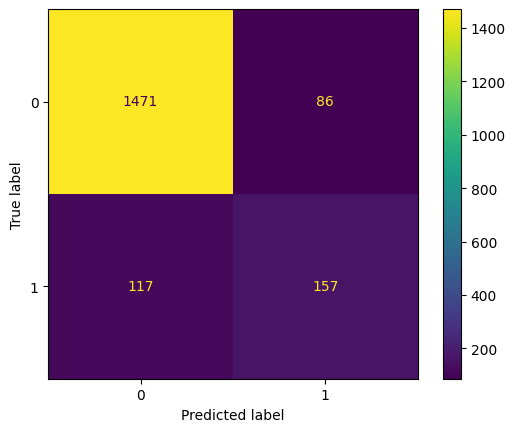


*************************Training Model**********************************
Accuracy: 0.989
F1 score: 0.989
Sensitivity: 0.984
Specificity: 0.995
ROC AUC score: 0.989


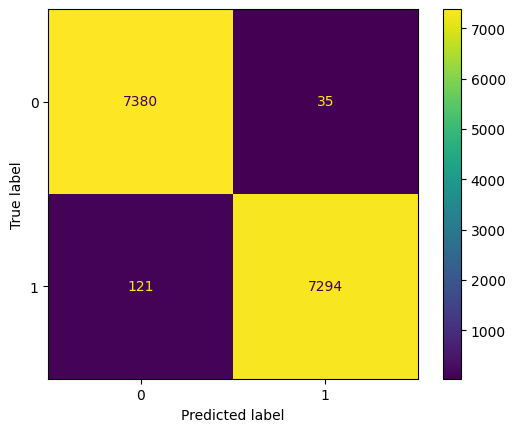

In [55]:
# Evaluate the testing model using accuracy score, F1 score, confusion matrix, MCC, sensitivity, specificity and ROC AUC score
print("*************************Testing Model***********************************")
print("Accuracy:", round(accuracy_score(y_test, y_pred),3))
print("F1 score:", round(f1_score(y_test, y_pred),3))
print("MCC :", round(matthews_corrcoef(y_test, y_pred),3))

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()  # extract true positives, false positives, true negatives, false negatives from confusion matrix
sensitivity = recall_score(y_test, y_pred)
specificity = tn / (tn + fp)
print("Sensitivity:",round(sensitivity,3))
print("Specificity:",round(specificity,3))

y_pred_prob = xgb.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC AUC score:", round(roc_auc,3))

disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

# Predict the target variable for the train set
y_predx = xgb.predict(X_train)

# Evaluate the training model using accuracy score, F1 score, confusion matrix, MCC, sensitivity, specificity and ROC AUC score
print("\n*************************Training Model**********************************")
print("Accuracy:", round(accuracy_score(y_train, y_predx),3))
print("F1 score:", round(f1_score(y_train, y_predx),3))

cm = confusion_matrix(y_train, y_predx)
tn, fp, fn, tp = cm.ravel()  # extract true positives, false positives, true negatives, false negatives from confusion matrix
sensitivity = recall_score(y_train, y_predx)
specificity = tn / (tn + fp)
print("Sensitivity:",round(sensitivity,3))
print("Specificity:",round(specificity,3))

y_pred_prob_t = xgb.predict_proba(X_train)[:,1]
roc_auc = roc_auc_score(y_train, y_predx)
print("ROC AUC score:", round(roc_auc,3))

disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

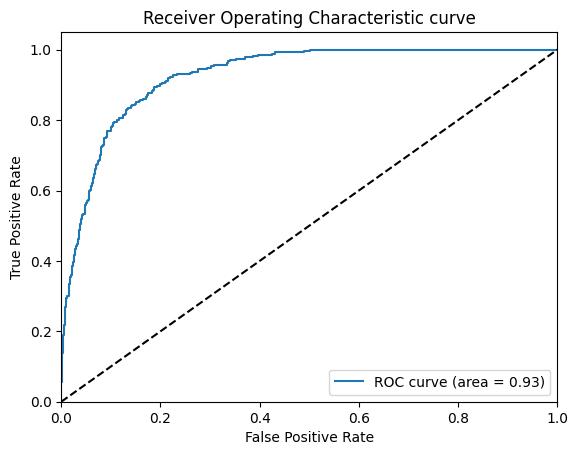

In [56]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate AUC score
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic curve')
plt.legend(loc="lower right")
plt.show()